# Aufgabe 1: Fourier-Spektrum

Die zweidimensionale diskrete Fourier-Transformation $\mathcal{F}: \mathbb{R}^{W \times H} \rightarrow \mathbb{C}^{W \times H}$ überführt ein Bild in eine alternative Repräsentation, in der es als Überlagerung von Sinus- und Kosinusfunktionen unterschiedlicher Frequenz dargestellt wird:

$$
    \mathcal{F}(I)(u, v) = \sum_{x=0}^{W-1} \sum_{y=0}^{H-1} I(x, y) \cdot \exp\biggl(-2 \pi i \Bigl(\frac{ux}{W} + \frac{vy}{H}\Bigr)\biggr) \,.
$$

Zur kompakten Schreibweise der Sinus- und Kosinusfunktionen dient dabei die Eulersche Formel:

$$
    \exp(i \cdot \varphi) = \cos(\varphi) + i \cdot \sin(\varphi) \,.
$$

Das Ergebnis $\mathcal{F}(I)(u, v)$ ist eine Funktion über dem Raum der komplexen Zahlen, welche die Amplitude und Phase einer Welle mit horizontaler Frequenz $u$ und vertikaler Frequenz $v$ kodieren.
Der Betrag (auch *Magnitude*) dieser Fourier-Koeffizienten entspricht dabei der Amplitude der Welle und das Argument (Winkel zwischen den Koeffizienten) entspricht der Phase.

Verwenden Sie `numpy.fft.fft2` zur Berechnung der Fouriertransformation eines Bildes!
Danach befindet sich das Zentrum $\mathcal{F}(I)(0, 0)$ des Fourier-Spektrums in der linken oberen Ecke des transformierten Bildes.
Nutzen Sie daher `numpy.fft.fftshift`, um das Zentrum in den Bildmittelpunkt zu verschieben und stellen Sie sowohl Magnitude als auch Phase des Spektrums graphisch dar!
Da die Magnitude üblicherweise vom Koeffizienten $(0, 0)$ dominiert wird, sollte vor der Darstellung die Grauwerttransformation $x \mapsto \log(1+x)$ zur Kontrastverbesserung angewandt werden.

## 0. Pfade, Pakete etc.

In [3]:
import glob
import imageio
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
image_filter = '../Bilder/*.jpg'

## 1. Laden und Normalisieren des Bildes

In [5]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

C:\Users\perso\AppData\Local\Temp\ipykernel_6368\2086190819.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


In [17]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

2.0


## 2. Berechnung der Fouriertransformation
Berechnen Sie nun die Fouriertransformation von `image`, indem Sie die entsprechende Funktion aus `numpy.fft` verwenden. Achten Sie darauf, das Spektrum zu zentrieren!

In [26]:
image_transformed = np.fft.fftshift(np.fft.fft2(image))
print(np.angle(image_transformed[0][0]))

-3.1415926535897927


## 3. Darstellung

Stellen Sie nun das Originalbild sowie Magnitude und Phase des Fourier-Spektrums graphisch dar.

Denken Sie daran, vor der Darstellung des Fourier-Spektrums die Grauwerttransformation $x \mapsto \log(1+x)$ anzuwenden.

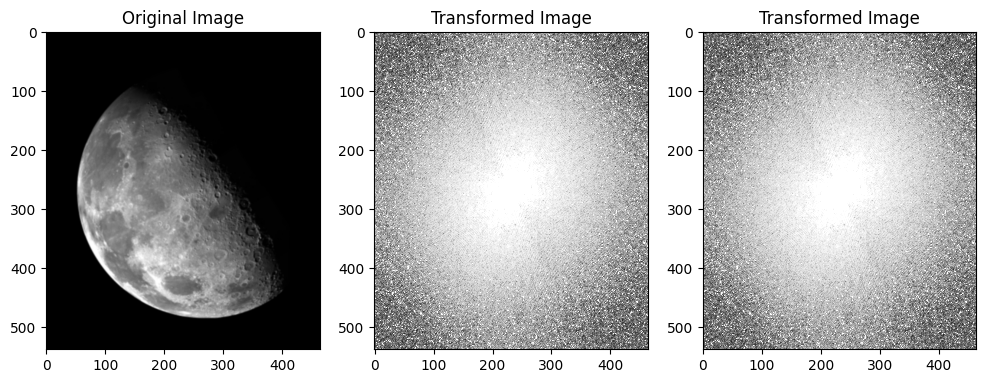

In [22]:
image_transformed = [np.log(1+x) for x in image_transformed ]
plt.figure('Convolution: image comparison', figsize=(12, 6))
plt.subplot(1,3,1, title='Original Image')
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.subplot(1,3,2, title='Transformed Image')
plt.imshow(np.absolute(image_transformed), cmap='gray', vmin=0, vmax=1)
plt.subplot(1,3,3, title='Transformed Image')
plt.imshow(np.absolute(image_transformed), cmap='gray', vmin=0, vmax=1)
plt.show()